# CAPSTONE PROJECT - Certified Data Analyst

## 1. Connect Colab to Google Drive

In [114]:
# Mengakses google drive ke dalam google colaboratory
from google.colab import drive
drive.mount('/content/gdrive')
import os

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [115]:
# Koneksikan sqlite dengan database
# Inisiasi directory tempat data akan dibaca dan disimpan
path = "gdrive/MyDrive/Studi Independen/Week 10/"

# Cek isi direktori
os.listdir(path)

['CoffeeShop_Dataset.db',
 'Template Notebook_DA.ipynb',
 'weather_stations.db',
 'customer_clean.csv',
 'product_clean.csv',
 'sales_receipts_clean.csv',
 'pastry_inventory_clean.csv',
 'sales_outlet_clean.csv',
 'generation_clean.csv',
 'Case 1_Resti Nur Azizah.ipynb',
 'customer.csv',
 'sales_receipts.csv',
 'product.csv',
 'pastry_inventory.csv',
 'sales_outlet.csv',
 'generations.csv']

## 2. Import Packages

In [116]:
import sqlite3
import pandas as pd
import numpy as np
from datetime import datetime as dt
import statistics
import matplotlib.pyplot as plt
from scipy.stats import chi2
from matplotlib import patches
import seaborn as sns

In [117]:
!pip install plotly==4.14.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 3. Connect SQLite to Python

In [118]:
# Kemudian kembali membuat connection ke database yang udah ada
conn_1 = sqlite3.connect(path + 'CoffeeShop_Dataset.db')

# Membuat cursor object untuk memanggil SQL statement
c_1 = conn_1.cursor()

c_1.execute("SELECT name FROM sqlite_master WHERE type='table'")
print(c_1.fetchall())

[('sales outlet',), ('pastry inventory',), ('product',), ('generations',), ('sales reciepts',), ('customer',)]


## 4. Data Preparation Using SQL

### **Menampilkan Data**



####Sales Outlet

In [119]:
sales_outlet_table = pd.read_sql_query('SELECT * FROM [sales outlet]', conn_1)
sales_outlet_table

,sales_outlet_id,sales_outlet_type,store_square_feet,store_address,store_city,store_state_province,store_telephone,store_postal_code,store_longitude,store_latitude,manager,Neighorhood
0,2,warehouse,3400,164-14 Jamaica Ave,Jamaica,NY,972-871-0402,11432,-73.795168,40.705226,NaN,Jamaica
1,3,retail,1300,32-20 Broadway,Long Island City,NY,777-718-3190,11106,-73.924008,40.761196,6.0,Astoria
2,4,retail,1300,604 Union Street,Brooklyn,NY,619-347-5193,11215,-73.983984,40.677645,11.0,Gowanus
3,5,retail,900,100 Church Street,New York,NY,343-212-5151,10007,-74.010130,40.713290,16.0,Lower Manhattan
4,6,retail,1000,122 E Broadway,New York,NY,613-555-4989,10002,-73.992687,40.713852,21.0,Lower East Side
5,7,retail,1200,224 E 57th Street,New York,NY,287-817-2330,10021,-73.960000,40.770000,26.0,Upper East Side
6,8,retail,1500,687 9th Avenue,New York,NY,652-212-7020,10036,-73.990338,40.761887,31.0,Hell's Kitchen
7,9,retail,1700,175 8th Avenue,New York,NY,242-212-0080,10011,-74.000502,40.742760,36.0,Chelsea
8,10,retail,1600,183 W 10th Street,New York,NY,674-646-6434,10014,-74.002722,40.734367,41.0,Greenwich Village


In [120]:
#melihat info dari tabel sales outlet
sales_outlet_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sales_outlet_id       9 non-null      int64  
 1   sales_outlet_type     9 non-null      object 
 2   store_square_feet     9 non-null      int64  
 3   store_address         9 non-null      object 
 4   store_city            9 non-null      object 
 5   store_state_province  9 non-null      object 
 6   store_telephone       9 non-null      object 
 7   store_postal_code     9 non-null      int64  
 8   store_longitude       9 non-null      float64
 9   store_latitude        9 non-null      float64
 10  manager               8 non-null      float64
 11  Neighorhood           9 non-null      object 
dtypes: float64(3), int64(3), object(6)
memory usage: 992.0+ bytes


####Pastry Inventory

In [121]:
#melihat isian data pada tabel ke 2
pastry_inventory_table = pd.read_sql_query('SELECT * FROM [pastry inventory]', conn_1)
pastry_inventory_table

,sales_outlet_id,transaction_date,product_id,start_of_day,quantity_sold,waste,% waste
0,3,4/1/2019,69,18,8,10,56%
1,3,4/1/2019,70,18,12,6,33%
2,3,4/1/2019,71,18,8,10,56%
3,3,4/1/2019,72,48,9,39,81%
4,3,4/1/2019,73,18,9,9,50%
...,...,...,...,...,...,...,...
302,8,4/27/2019,69,18,1,17,94%
303,8,4/27/2019,70,18,4,14,78%
304,8,4/27/2019,71,18,2,16,89%
305,8,4/27/2019,72,48,19,29,60%


In [122]:
pastry_inventory_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   sales_outlet_id   307 non-null    int64 
 1   transaction_date  307 non-null    object
 2   product_id        307 non-null    int64 
 3   start_of_day      307 non-null    int64 
 4   quantity_sold     307 non-null    int64 
 5   waste             307 non-null    int64 
 6   % waste           307 non-null    object
dtypes: int64(5), object(2)
memory usage: 16.9+ KB


####Product

In [123]:
#melihat isian data pada tabel ke 3
product_table = pd.read_sql_query('SELECT * FROM product', conn_1)
product_table

,product_id,product_group,product_category,product_type,product,product_description,unit_of_measure,current_wholesale_price,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn
0,1,Whole Bean/Teas,Coffee beans,Organic Beans,Brazilian - Organic,It's like Carnival in a cup. Clean and smooth.,12 oz,14.40,$18.00,Y,N,N
1,2,Whole Bean/Teas,Coffee beans,House blend Beans,Our Old Time Diner Blend,Out packed blend of beans that is reminiscent ...,12 oz,14.40,$18.00,Y,N,N
2,3,Whole Bean/Teas,Coffee beans,Espresso Beans,Espresso Roast,Our house blend for a good espresso shot.,1 lb,11.80,$14.75,Y,N,N
3,4,Whole Bean/Teas,Coffee beans,Espresso Beans,Primo Espresso Roast,Our primium single source of hand roasted beans.,1 lb,16.36,$20.45,Y,N,N
4,5,Whole Bean/Teas,Coffee beans,Gourmet Beans,Columbian Medium Roast,A smooth cup of coffee any time of day.,1 lb,12.00,$15.00,Y,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...
83,84,Add-ons,Flavours,Regular syrup,Chocolate syrup,Bursting with chocolate flavour,pump,0.04,$0.80,Y,N,N
84,85,Beverages,Coffee,Specialty coffee,Rio Nights,2 shots of Ouro Brasilerio and pure cane sugar...,6 oz,1.20,$6.00,Y,N,Y
85,87,Beverages,Coffee,Barista Espresso,Ouro Brasileiro shot,From Rio,1.5 oz,0.60,$3.00,Y,N,N
86,88,Beverages,Coffee,Barista Espresso,Ouro Brasileiro shot promo,Ouro promo,16 oz,0.42,$2.10,Y,Y,N


In [124]:
product_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_id               88 non-null     int64  
 1   product_group            88 non-null     object 
 2   product_category         88 non-null     object 
 3   product_type             88 non-null     object 
 4   product                  88 non-null     object 
 5   product_description      88 non-null     object 
 6   unit_of_measure          88 non-null     object 
 7   current_wholesale_price  88 non-null     float64
 8   current_retail_price     88 non-null     object 
 9   tax_exempt_yn            88 non-null     object 
 10  promo_yn                 88 non-null     object 
 11  new_product_yn           88 non-null     object 
dtypes: float64(1), int64(1), object(10)
memory usage: 8.4+ KB


####Genaration

In [125]:
generations_table = pd.read_sql_query('SELECT * FROM generations', conn_1)
generations_table.head()

,birth_year,generation
0,1946,Baby Boomers
1,1947,Baby Boomers
2,1948,Baby Boomers
3,1949,Baby Boomers
4,1950,Baby Boomers


In [126]:
generations_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   birth_year  70 non-null     int64 
 1   generation  70 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


####Sales Receipts

In [127]:
sales_receipts_table = pd.read_sql_query('SELECT * FROM [sales reciepts]', conn_1)
sales_receipts_table

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn
0,7,2019-04-01,12:04:43,3,12,558,N,1,1,52,1,2.50,2.50,N
1,11,2019-04-01,15:54:39,3,17,781,N,1,1,27,2,7.00,3.50,N
2,19,2019-04-01,14:34:59,3,17,788,Y,1,1,46,2,5.00,2.50,N
3,32,2019-04-01,16:06:04,3,12,683,N,1,1,23,2,5.00,2.50,N
4,33,2019-04-01,19:18:37,3,17,99,Y,1,1,34,1,2.45,2.45,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49889,753,2019-04-29,16:51:58,8,42,0,N,1,1,30,1,3.00,3.00,N
49890,756,2019-04-29,16:51:14,8,42,8412,Y,1,1,25,2,4.40,2.20,N
49891,759,2019-04-29,11:17:36,8,15,0,Y,1,1,31,1,2.20,2.20,N
49892,763,2019-04-29,15:45:52,8,45,8030,N,1,1,44,2,5.00,2.50,N


In [128]:
sales_receipts_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49894 entries, 0 to 49893
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    49894 non-null  int64  
 1   transaction_date  49894 non-null  object 
 2   transaction_time  49894 non-null  object 
 3   sales_outlet_id   49894 non-null  int64  
 4   staff_id          49894 non-null  int64  
 5   customer_id       49894 non-null  int64  
 6   instore_yn        49894 non-null  object 
 7   order             49894 non-null  int64  
 8   line_item_id      49894 non-null  int64  
 9   product_id        49894 non-null  int64  
 10  quantity          49894 non-null  int64  
 11  line_item_amount  49894 non-null  float64
 12  unit_price        49894 non-null  float64
 13  promo_item_yn     49894 non-null  object 
dtypes: float64(2), int64(8), object(4)
memory usage: 5.3+ MB


####Customer

In [129]:
customer_table = pd.read_sql_query('SELECT * FROM customer', conn_1)
customer_table

,customer_id,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year
0,1,3,Kelly Key,Venus@adipiscing.edu,2017-01-04,908-424-2890,1950-05-29,M,1950
1,2,3,Clark Schroeder,Nora@fames.gov,2017-01-07,032-732-6308,1950-07-30,M,1950
2,3,3,Elvis Cardenas,Brianna@tellus.edu,2017-01-10,459-375-9187,1950-09-30,M,1950
3,4,3,Rafael Estes,Ina@non.gov,2017-01-13,576-640-9226,1950-12-01,M,1950
4,5,3,Colin Lynn,Dale@Integer.com,2017-01-15,344-674-6569,1951-02-01,M,1951
...,...,...,...,...,...,...,...,...,...
2241,8497,8,Rae,Kylie@facilisi.org,2017-01-06,081-440-6679,1977-12-10,F,1977
2242,8498,8,April,Daniel@placerat.us,2019-01-20,705-545-5246,2000-12-07,N,2000
2243,8499,8,Clementine,Dieter@ac.us,2017-11-09,297-550-7776,1996-06-04,F,1996
2244,8500,8,Linda,Dillon@pretium.gov,2017-08-21,255-202-7435,1990-03-01,N,1990


In [130]:
customer_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   customer_id          2246 non-null   int64 
 1   home_store           2246 non-null   int64 
 2   customer_first-name  2246 non-null   object
 3   customer_email       2246 non-null   object
 4   customer_since       2246 non-null   object
 5   loyalty_card_number  2246 non-null   object
 6   birthdate            2246 non-null   object
 7   gender               2246 non-null   object
 8   birth_year           2246 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 158.0+ KB


## 5. Problem Statement


A. Customer Profiling :
1. Berapa rata-rata usia customer?
2. Berapa rata-rata lama customer bergabung?
3. Berapa proporsi gender customer?
4. Berapa rata-rata usia pada tiap outlet?
5. Berapa banyak quantity customer berdasarkan usia?
6. Berapa banyak customer berdasarkan generasi, customer terbanyak pada generasi apa?

B. Transaksi Penjualan :
1. Berapa banyak penjualan yang terjadi pad tiap outlet, dan outlet mana yang memiliki penjualan paling rendah?
2. Pada bulan April, transaksi tertinggi terjadi pada tanggal berapa


C. Product Recomendation : 
1. Produk rekomendasi apa yang bisa menjadi produk terlaris dari
   masing-masing store
2. Dari segmentasi generation, customer mana yang memiliki kecintaan 
   terhadap kopi?
3. Product group yang memiliki jumlah penjulan paling banyak

D. Optimalisasi Inventory : 
  Product dengan jumlah waste terbanyak





## 6. Data Preparation Using Python (Cleansing, Manipulation, Handling Outlier dst)

### **MISSING VALUE**

In [131]:
#mengecek missing value
sales_outlet_table.isnull().any()

sales_outlet_id         False
sales_outlet_type       False
store_square_feet       False
store_address           False
store_city              False
store_state_province    False
store_telephone         False
store_postal_code       False
store_longitude         False
store_latitude          False
manager                  True
Neighorhood             False
dtype: bool

In [132]:
#mengecek jumlah missing value 
sales_outlet_table.isna().sum()

sales_outlet_id         0
sales_outlet_type       0
store_square_feet       0
store_address           0
store_city              0
store_state_province    0
store_telephone         0
store_postal_code       0
store_longitude         0
store_latitude          0
manager                 1
Neighorhood             0
dtype: int64

Hasil cek : ditemukan satu missing value pada kolom manager

In [133]:
#mengecek missing value
pastry_inventory_table.isnull().any()

sales_outlet_id     False
transaction_date    False
product_id          False
start_of_day        False
quantity_sold       False
waste               False
% waste             False
dtype: bool

In [134]:
#mengecek jumlah missing value 
pastry_inventory_table.isna().sum()

sales_outlet_id     0
transaction_date    0
product_id          0
start_of_day        0
quantity_sold       0
waste               0
% waste             0
dtype: int64

Hasil cek : tidak ada missing value

In [135]:
#mengecek missing value
product_table.isnull().any()

product_id                 False
product_group              False
product_category           False
product_type               False
product                    False
product_description        False
unit_of_measure            False
current_wholesale_price    False
current_retail_price       False
tax_exempt_yn              False
promo_yn                   False
new_product_yn             False
dtype: bool

In [136]:
product_table.isna().sum()

product_id                 0
product_group              0
product_category           0
product_type               0
product                    0
product_description        0
unit_of_measure            0
current_wholesale_price    0
current_retail_price       0
tax_exempt_yn              0
promo_yn                   0
new_product_yn             0
dtype: int64

Hasil cek : tidak ada missing value

In [137]:
#mengecek missing value
generations_table.isnull().any()

birth_year    False
generation    False
dtype: bool

In [138]:
generations_table.isna().sum()

birth_year    0
generation    0
dtype: int64

Hasil cek : tidak ada missing value

In [139]:
#mengecek missing value
sales_receipts_table.isnull().any()

transaction_id      False
transaction_date    False
transaction_time    False
sales_outlet_id     False
staff_id            False
customer_id         False
instore_yn          False
order               False
line_item_id        False
product_id          False
quantity            False
line_item_amount    False
unit_price          False
promo_item_yn       False
dtype: bool

In [140]:
sales_receipts_table.isna().sum()

transaction_id      0
transaction_date    0
transaction_time    0
sales_outlet_id     0
staff_id            0
customer_id         0
instore_yn          0
order               0
line_item_id        0
product_id          0
quantity            0
line_item_amount    0
unit_price          0
promo_item_yn       0
dtype: int64

Hasil cek : tidak ada missing value

In [141]:
#mengecek missing value
customer_table.isnull().any()

customer_id            False
home_store             False
customer_first-name    False
customer_email         False
customer_since         False
loyalty_card_number    False
birthdate              False
gender                 False
birth_year             False
dtype: bool

In [142]:
customer_table.isna().sum()

customer_id            0
home_store             0
customer_first-name    0
customer_email         0
customer_since         0
loyalty_card_number    0
birthdate              0
gender                 0
birth_year             0
dtype: int64

Hasil cek : tidak ada missing value

In [143]:
customer_table.nunique()

customer_id            2246
home_store                3
customer_first-name    1640
customer_email         2246
customer_since          794
loyalty_card_number    2246
birthdate              1883
gender                    3
birth_year               52
dtype: int64

### **DUPLICATED**

In [144]:
#Data dari tabel Sales Outlet
#mencari apakah ada data duplicate, jika output true maka ada duplicate, jika false maka tidak ada duplicate
sales_outlet_table.duplicated().any()

False

In [145]:
#mencari duplicare dari tabel pastry inventory
pastry_inventory_table.duplicated().any()

False

In [146]:
#mencari duplicare dari tabel product
product_table.duplicated().any()

False

In [147]:
#mencari duplicare dari tabel generation
generations_table.duplicated().any()

False

In [148]:
#mencari duplicare dari tabel sales_receipts
sales_receipts_table.duplicated().any()

False

In [149]:
#mencari duplicare dari tabel customer
customer_table.duplicated().any()

False

In [150]:
sales_outlet_table.nunique()

sales_outlet_id         9
sales_outlet_type       2
store_square_feet       8
store_address           9
store_city              4
store_state_province    1
store_telephone         9
store_postal_code       9
store_longitude         9
store_latitude          9
manager                 8
Neighorhood             9
dtype: int64

### **CLEANSING**

In [151]:
#Karena ditemukan null pada tabel sales outlet (kolom manager), maka dilakukan cleansing data (manipulation data dengan menghapus baris NaN) :
sales_outlet_table.dropna(inplace=True)

In [152]:
#cek apakah masih ada data NaN pada tabel sales outlet
sales_outlet_table.isna().sum()

sales_outlet_id         0
sales_outlet_type       0
store_square_feet       0
store_address           0
store_city              0
store_state_province    0
store_telephone         0
store_postal_code       0
store_longitude         0
store_latitude          0
manager                 0
Neighorhood             0
dtype: int64

hasil cleansing : sudah tidak ada missing value

### **DATA MANIPULATION**

In [153]:
#mengubah nama kolom % waste menjadi %_waste
pastry_inventory_table.rename(columns={'% waste': '%_waste'}, inplace=True)

In [154]:
#menghapus tanda %
pastry_inventory_table['%_waste'] = pastry_inventory_table['%_waste'].str.replace('%', ' ')
pastry_inventory_table['%_waste']  = pastry_inventory_table['%_waste'] .str.strip()
pastry_inventory_table.head()

,sales_outlet_id,transaction_date,product_id,start_of_day,quantity_sold,waste,%_waste
0,3,4/1/2019,69,18,8,10,56
1,3,4/1/2019,70,18,12,6,33
2,3,4/1/2019,71,18,8,10,56
3,3,4/1/2019,72,48,9,39,81
4,3,4/1/2019,73,18,9,9,50


In [155]:
# mengganti type data pada kolom %_waste
pastry_inventory_table['%_waste']  = pastry_inventory_table['%_waste']  .astype('int64')

In [156]:
#mengubah tipe data transaction_date
pastry_inventory_table['transaction_date'] = pd.to_datetime(pastry_inventory_table['transaction_date'])

In [157]:
pastry_inventory_table.dtypes

sales_outlet_id              int64
transaction_date    datetime64[ns]
product_id                   int64
start_of_day                 int64
quantity_sold                int64
waste                        int64
%_waste                      int64
dtype: object

Data Manipulation pada tabel product kolom current_retail_price

In [158]:
# Menghilangkan simbol dolar ($) pada data produk (df_prod), mengubah tipe data menjadi float, dan menambahkan kolom baru 'current_retail_price_value'
product_table['current_retail_price_value'] = product_table['current_retail_price'].apply(lambda x: float(x[1:]))
product_table.dtypes

product_id                      int64
product_group                  object
product_category               object
product_type                   object
product                        object
product_description            object
unit_of_measure                object
current_wholesale_price       float64
current_retail_price           object
tax_exempt_yn                  object
promo_yn                       object
new_product_yn                 object
current_retail_price_value    float64
dtype: object

In [159]:
product_table.head()

,product_id,product_group,product_category,product_type,product,product_description,unit_of_measure,current_wholesale_price,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn,current_retail_price_value
0,1,Whole Bean/Teas,Coffee beans,Organic Beans,Brazilian - Organic,It's like Carnival in a cup. Clean and smooth.,12 oz,14.40,$18.00,Y,N,N,18.00
1,2,Whole Bean/Teas,Coffee beans,House blend Beans,Our Old Time Diner Blend,Out packed blend of beans that is reminiscent ...,12 oz,14.40,$18.00,Y,N,N,18.00
2,3,Whole Bean/Teas,Coffee beans,Espresso Beans,Espresso Roast,Our house blend for a good espresso shot.,1 lb,11.80,$14.75,Y,N,N,14.75
3,4,Whole Bean/Teas,Coffee beans,Espresso Beans,Primo Espresso Roast,Our primium single source of hand roasted beans.,1 lb,16.36,$20.45,Y,N,N,20.45
4,5,Whole Bean/Teas,Coffee beans,Gourmet Beans,Columbian Medium Roast,A smooth cup of coffee any time of day.,1 lb,12.00,$15.00,Y,N,N,15.00


In [160]:
#mengubah tipe data transaction_date
sales_receipts_table['transaction_date'] = pd.to_datetime(sales_receipts_table['transaction_date'])

In [161]:
#menambahkan kolom usia seperti berikut ini
customer_table.insert(8, column="usia", value = 2023 - customer_table['birth_year'])

In [162]:
#mengubah tipe data customer_since'
customer_table['customer_since'] = pd.to_datetime(customer_table['customer_since'])

### **HANDLING OUTLIER**

**Mengecek Outlier pada Tiap Tabel**


---





<Axes: >

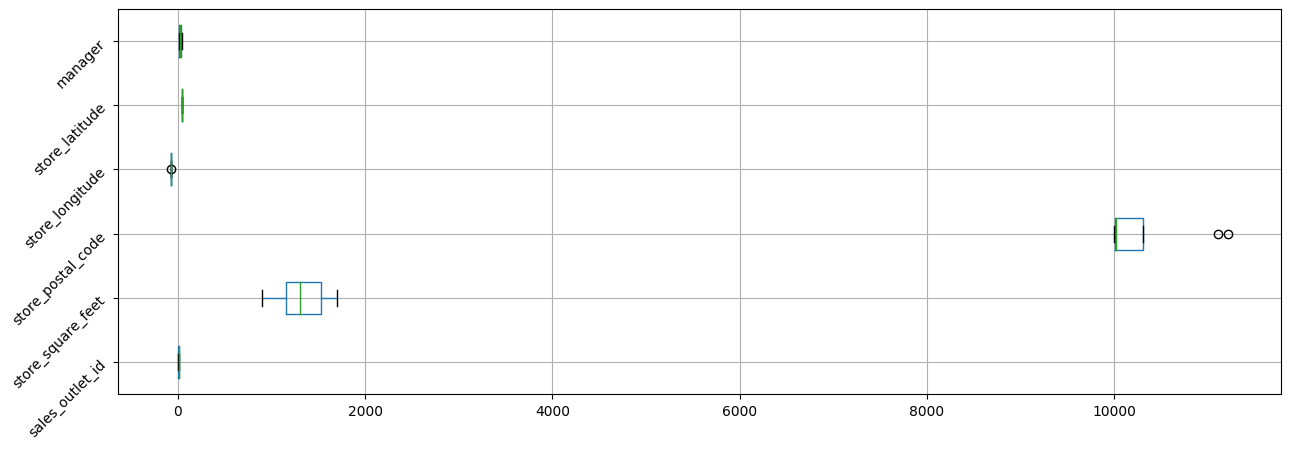

In [163]:
#tabel sales outlet
sales_outlet_table.boxplot(vert=False, rot=45, figsize=(15,5))

<Axes: >

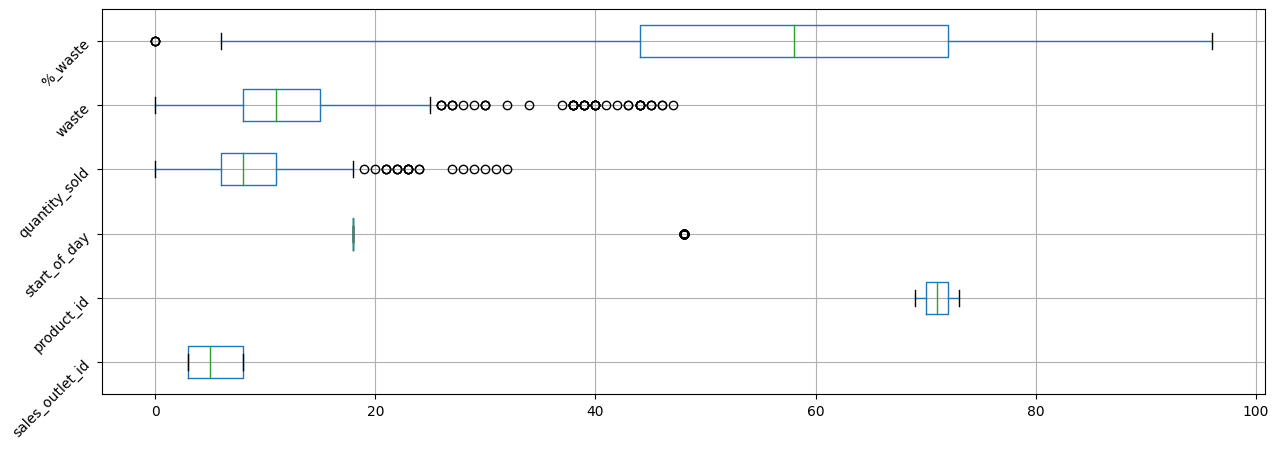

In [164]:
#tabel pastry inventory
pastry_inventory_table.boxplot(vert=False, rot=45, figsize=(15,5))

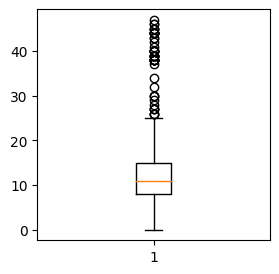

In [165]:
#menampilkan outlier pada kolom waste
plt.figure(figsize=(3,3))
plt.boxplot(pastry_inventory_table["waste"])
plt.show()

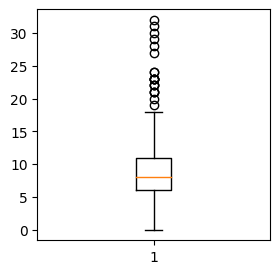

In [166]:
#menampilkan outlier pada kolom quantity sold
plt.figure(figsize=(3,3))
plt.boxplot(pastry_inventory_table["quantity_sold"])
plt.show()

<Axes: >

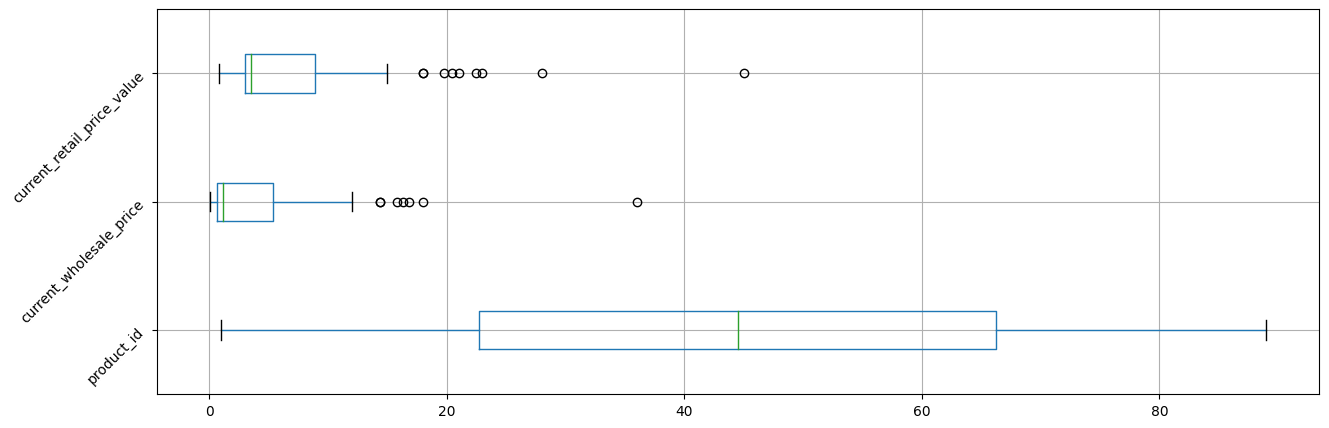

In [167]:
#tabel product
product_table.boxplot(vert=False, rot=45, figsize=(15,5))

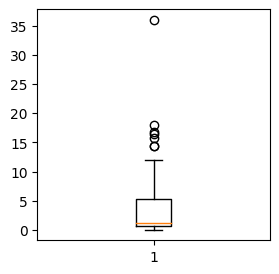

In [168]:
 #menampilkan outlier pada kolom current wholesale price
plt.figure(figsize=(3,3))
plt.boxplot(product_table["current_wholesale_price"])
plt.show()

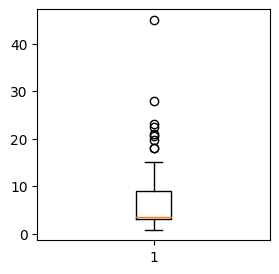

In [169]:
#menampilkan outlier pada kolom current retail price value
plt.figure(figsize=(3,3))
plt.boxplot(product_table["current_retail_price_value"])
plt.show()

<Axes: >

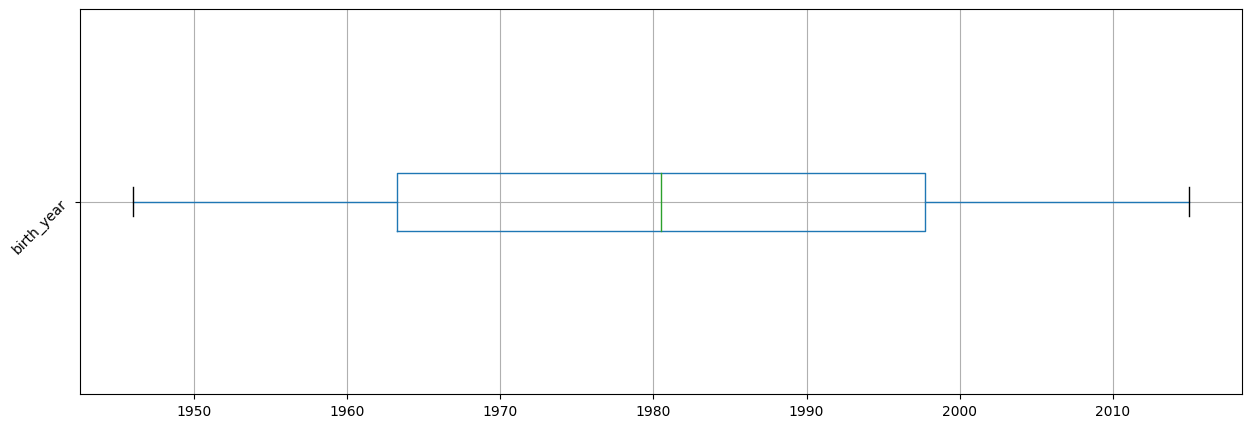

In [170]:
#tabel generations
generations_table.boxplot(vert=False, rot=45, figsize=(15,5))

<Axes: >

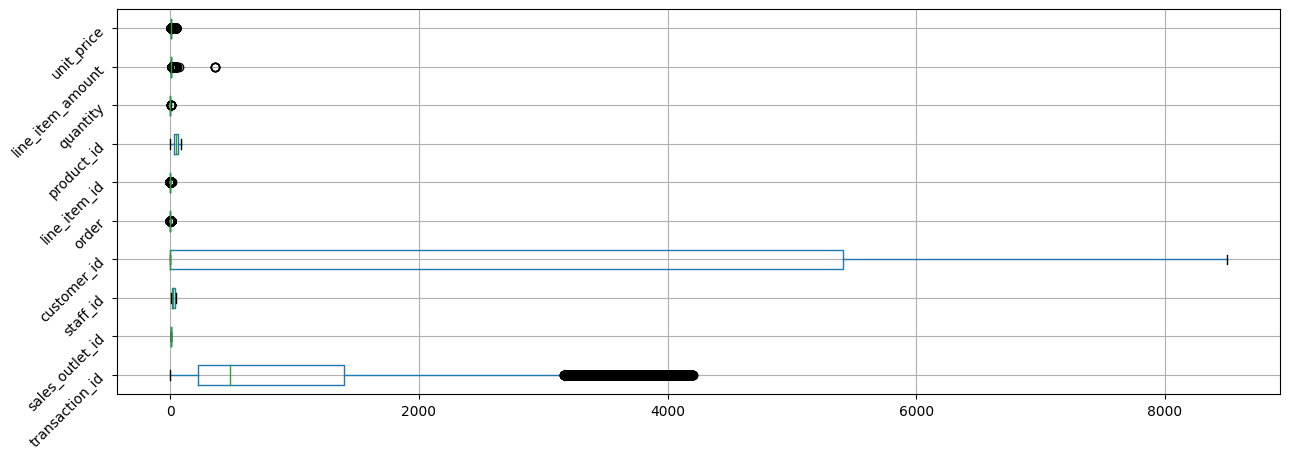

In [171]:
#tabel sales_receipts 
sales_receipts_table.boxplot(vert=False, rot=45, figsize=(15,5))

In [172]:
sales_receipts_table

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn
0,7,2019-04-01,12:04:43,3,12,558,N,1,1,52,1,2.50,2.50,N
1,11,2019-04-01,15:54:39,3,17,781,N,1,1,27,2,7.00,3.50,N
2,19,2019-04-01,14:34:59,3,17,788,Y,1,1,46,2,5.00,2.50,N
3,32,2019-04-01,16:06:04,3,12,683,N,1,1,23,2,5.00,2.50,N
4,33,2019-04-01,19:18:37,3,17,99,Y,1,1,34,1,2.45,2.45,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49889,753,2019-04-29,16:51:58,8,42,0,N,1,1,30,1,3.00,3.00,N
49890,756,2019-04-29,16:51:14,8,42,8412,Y,1,1,25,2,4.40,2.20,N
49891,759,2019-04-29,11:17:36,8,15,0,Y,1,1,31,1,2.20,2.20,N
49892,763,2019-04-29,15:45:52,8,45,8030,N,1,1,44,2,5.00,2.50,N


In [173]:
sales_receipts_table.dtypes

transaction_id               int64
transaction_date    datetime64[ns]
transaction_time            object
sales_outlet_id              int64
staff_id                     int64
customer_id                  int64
instore_yn                  object
order                        int64
line_item_id                 int64
product_id                   int64
quantity                     int64
line_item_amount           float64
unit_price                 float64
promo_item_yn               object
dtype: object

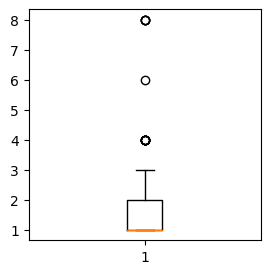

In [174]:
#menampilkan outlier pada kolom quantity
plt.figure(figsize=(3,3))
plt.boxplot(sales_receipts_table["quantity"])
plt.show()

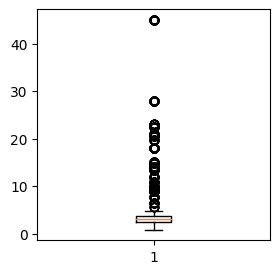

In [175]:
#menampilkan outlier pada kolom unit_price
plt.figure(figsize=(3,3))
plt.boxplot(sales_receipts_table["unit_price"])
plt.show()

In [176]:
sales_receipts_table.tail()

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn
49889,753,2019-04-29,16:51:58,8,42,0,N,1,1,30,1,3.0,3.0,N
49890,756,2019-04-29,16:51:14,8,42,8412,Y,1,1,25,2,4.4,2.2,N
49891,759,2019-04-29,11:17:36,8,15,0,Y,1,1,31,1,2.2,2.2,N
49892,763,2019-04-29,15:45:52,8,45,8030,N,1,1,44,2,5.0,2.5,N
49893,763,2019-04-29,15:45:52,8,45,8030,N,1,5,75,1,3.5,3.5,N


<Axes: >

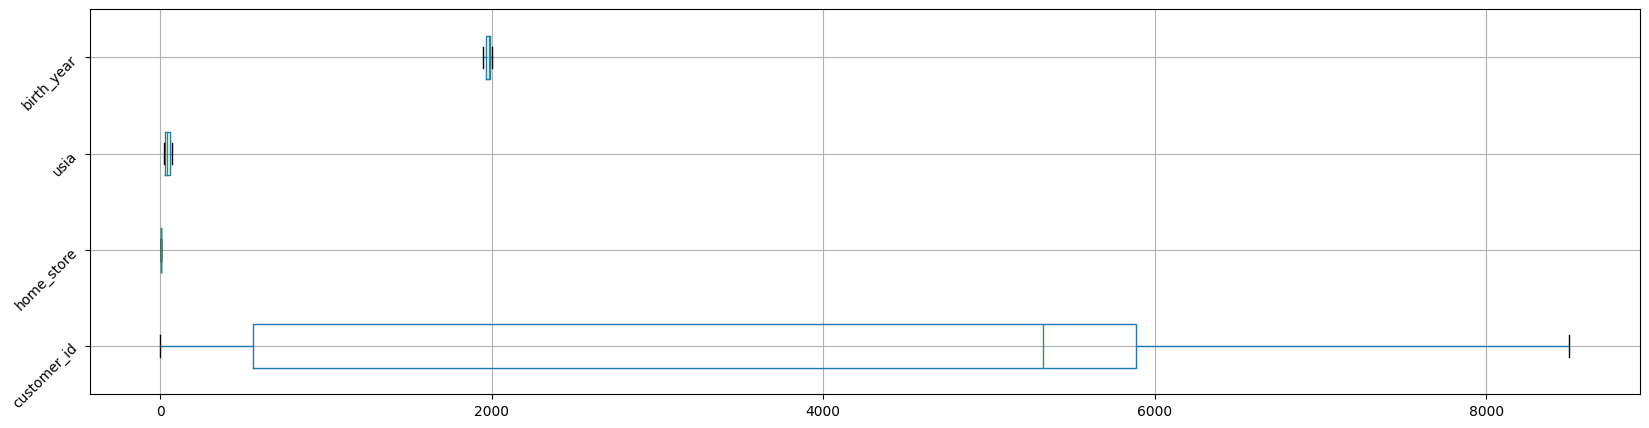

In [177]:
customer_table.boxplot(vert=False, rot=45, figsize=(20,5))

## 7. Exploratory Data Analysis & Visualization

### **Data Preprocessing**

In [178]:
c_1.execute("SELECT name FROM sqlite_master WHERE type='table'")
print(c_1.fetchall())

[('sales outlet',), ('pastry inventory',), ('product',), ('generations',), ('sales reciepts',), ('customer',)]


In [179]:
# Menampilkan table dalam bentuk dataframe
sqlite_table = pd.read_sql_query('SELECT * FROM sqlite_master', conn_1)
sqlite_table

,type,name,tbl_name,rootpage,sql
0,table,sales outlet,sales outlet,2,"CREATE TABLE ""sales outlet"" (\n""sales_outlet_i..."
1,table,pastry inventory,pastry inventory,3,"CREATE TABLE ""pastry inventory"" (\n""sales_outl..."
2,table,product,product,7,"CREATE TABLE ""product"" (\n""product_id"" INTEGER..."
3,table,generations,generations,11,"CREATE TABLE ""generations"" (\n""birth_year"" INT..."
4,table,sales reciepts,sales reciepts,12,"CREATE TABLE ""sales reciepts"" (\n""transaction_..."
5,table,customer,customer,730,"CREATE TABLE ""customer"" (\n""customer_id"" INTEG..."


### **Data Wrangling**

**Grouping (filter coloumn)**

---



In [180]:
# Memilih beberapa kolom pada dataframe
df_customer = customer_table[['customer_id', 'home_store','customer_first-name', 'customer_since', 'gender','usia','birth_year']]
df_customer.tail(2)

,customer_id,home_store,customer_first-name,customer_since,gender,usia,birth_year
2244,8500,8,Linda,2017-08-21,N,33,1990
2245,8501,8,Moana,2018-07-06,F,57,1966


In [181]:
df_sales_receipts = sales_receipts_table[['transaction_id', 'transaction_date','sales_outlet_id','customer_id','order','product_id',	'quantity','unit_price', 'promo_item_yn']]
df_sales_receipts.head(2)

,transaction_id,transaction_date,sales_outlet_id,customer_id,order,product_id,quantity,unit_price,promo_item_yn
0,7,2019-04-01,3,558,1,52,1,2.5,N
1,11,2019-04-01,3,781,1,27,2,3.5,N


In [182]:
df_product = product_table[['product_id','product_group','product_category','product_type','product','current_wholesale_price','current_retail_price_value','tax_exempt_yn','promo_yn','new_product_yn']]
df_product.tail(2)

,product_id,product_group,product_category,product_type,product,current_wholesale_price,current_retail_price_value,tax_exempt_yn,promo_yn,new_product_yn
86,88,Beverages,Coffee,Barista Espresso,Ouro Brasileiro shot promo,0.42,2.10,Y,Y,N
87,89,Food,Bakery,Scone,Ginger Scone promo,1.72,2.65,N,Y,N


In [183]:
df_pastry_inventory = pastry_inventory_table[['sales_outlet_id','transaction_date','product_id','start_of_day','quantity_sold','waste','%_waste']]
df_pastry_inventory.head(2)

,sales_outlet_id,transaction_date,product_id,start_of_day,quantity_sold,waste,%_waste
0,3,2019-04-01,69,18,8,10,56
1,3,2019-04-01,70,18,12,6,33


In [184]:
df_sales_outlet = sales_outlet_table[['sales_outlet_id','sales_outlet_type','store_city',	'store_state_province','store_longitude','store_latitude','manager','Neighorhood']]
df_sales_outlet.head(2)

,sales_outlet_id,sales_outlet_type,store_city,store_state_province,store_longitude,store_latitude,manager,Neighorhood
1,3,retail,Long Island City,NY,-73.924008,40.761196,6.0,Astoria
2,4,retail,Brooklyn,NY,-73.983984,40.677645,11.0,Gowanus


**EXPORT DATA AFTER CLEANSING & FILTERING KOLOM**

---



In [185]:
customer_table.to_csv(path + 'customer.csv')
sales_receipts_table.to_csv(path + 'sales_receipts.csv')
product_table.to_csv(path + 'product.csv')
pastry_inventory_table.to_csv(path + 'pastry_inventory.csv')
sales_outlet_table.to_csv(path + 'sales_outlet.csv')
generations_table.to_csv(path + 'generations.csv')

In [186]:
df_customer.to_csv(path + "customer_clean.csv")
df_sales_receipts.to_csv(path + "sales_receipts_clean.csv")
df_product.to_csv(path + "product_clean.csv")
df_pastry_inventory.to_csv(path + "pastry_inventory_clean.csv")
df_sales_outlet.to_csv(path + "sales_outlet_clean.csv")
generations_table.to_csv(path + "generation_clean.csv")

### **Start The Analysis**

####Profiling Customer


In [187]:
#join tabel receipts dengan tabel customer
join_1 = df_sales_receipts.merge(df_customer, how='inner', on='customer_id')

In [188]:
join_1.head()

,transaction_id,transaction_date,sales_outlet_id,customer_id,order,product_id,quantity,unit_price,promo_item_yn,home_store,customer_first-name,customer_since,gender,usia,birth_year
0,7,2019-04-01,3,558,1,52,1,2.50,N,3,Melissa Johnson,2018-06-19,F,40,1983
1,1539,2019-04-01,3,558,1,29,1,2.50,N,3,Melissa Johnson,2018-06-19,F,40,1983
2,2188,2019-04-01,3,558,1,48,2,2.50,N,3,Melissa Johnson,2018-06-19,F,40,1983
3,78,2019-04-02,3,558,1,60,1,3.75,N,3,Melissa Johnson,2018-06-19,F,40,1983
4,14,2019-04-03,3,558,1,32,1,3.00,N,3,Melissa Johnson,2018-06-19,F,40,1983


In [189]:
join_1.duplicated().any()

True

In [190]:
df_join_1 = join_1.drop_duplicates(subset=['transaction_id']).reset_index()

In [191]:
df_join_1.duplicated().any()

False

In [192]:
join_gen = df_customer.merge(generations_table, how='inner', on='birth_year')
join_gen.head(2)

,customer_id,home_store,customer_first-name,customer_since,gender,usia,birth_year,generation
0,1,3,Kelly Key,2017-01-04,M,73,1950,Baby Boomers
1,2,3,Clark Schroeder,2017-01-07,M,73,1950,Baby Boomers


Banyak customer berdasarkan generasi

In [193]:
group_gen = join_gen.groupby(['generation'])['customer_id'].count().sort_values(ascending=False).reset_index()
group_gen

,generation,customer_id
0,Baby Boomers,529
1,Gen X,522
2,Older Millennials,515
3,Gen Z,382
4,Younger Millennials,298


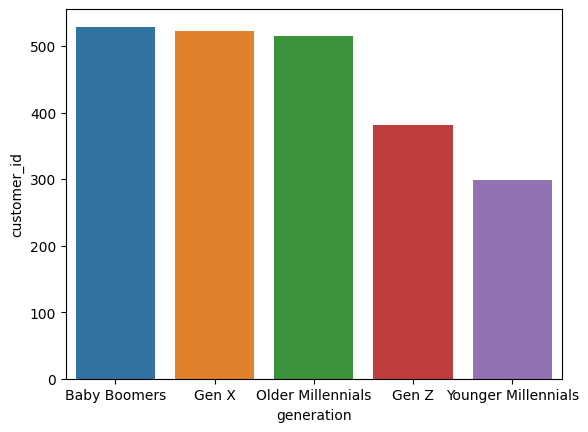

In [194]:
sns.barplot(x="generation", y="customer_id", data=group_gen)
plt.show()

Berapa rata-rata usia dari customer

In [195]:
#rata-rata usia customer
mean_usia = np.mean(df_join_1['usia'])
mean_usia

46.74792754068161

In [196]:
#Melihat statistik deskriptif dari usia customer
df_join_1['usia'].describe()

count    3257.000000
mean       46.747928
std        14.930614
min        22.000000
25%        33.000000
50%        46.000000
75%        60.000000
max        73.000000
Name: usia, dtype: float64

Berapa banyak quantity pembelian customer berdasarkan usianya

In [197]:
#melihat data usia customer dan jumlah quantity ordernya
total = df_join_1.groupby(['usia'])['quantity'].sum().sort_values(ascending= False).reset_index()
total.head()

,usia,quantity
0,24,130
1,27,129
2,32,127
3,28,126
4,38,126


In [198]:
total.describe()

,usia,quantity
count,52.000000,52.000000
mean,47.500000,93.211538
std,15.154757,22.310937
min,22.000000,26.000000
25%,34.750000,80.000000
50%,47.500000,92.000000
75%,60.250000,109.000000
max,73.000000,130.000000


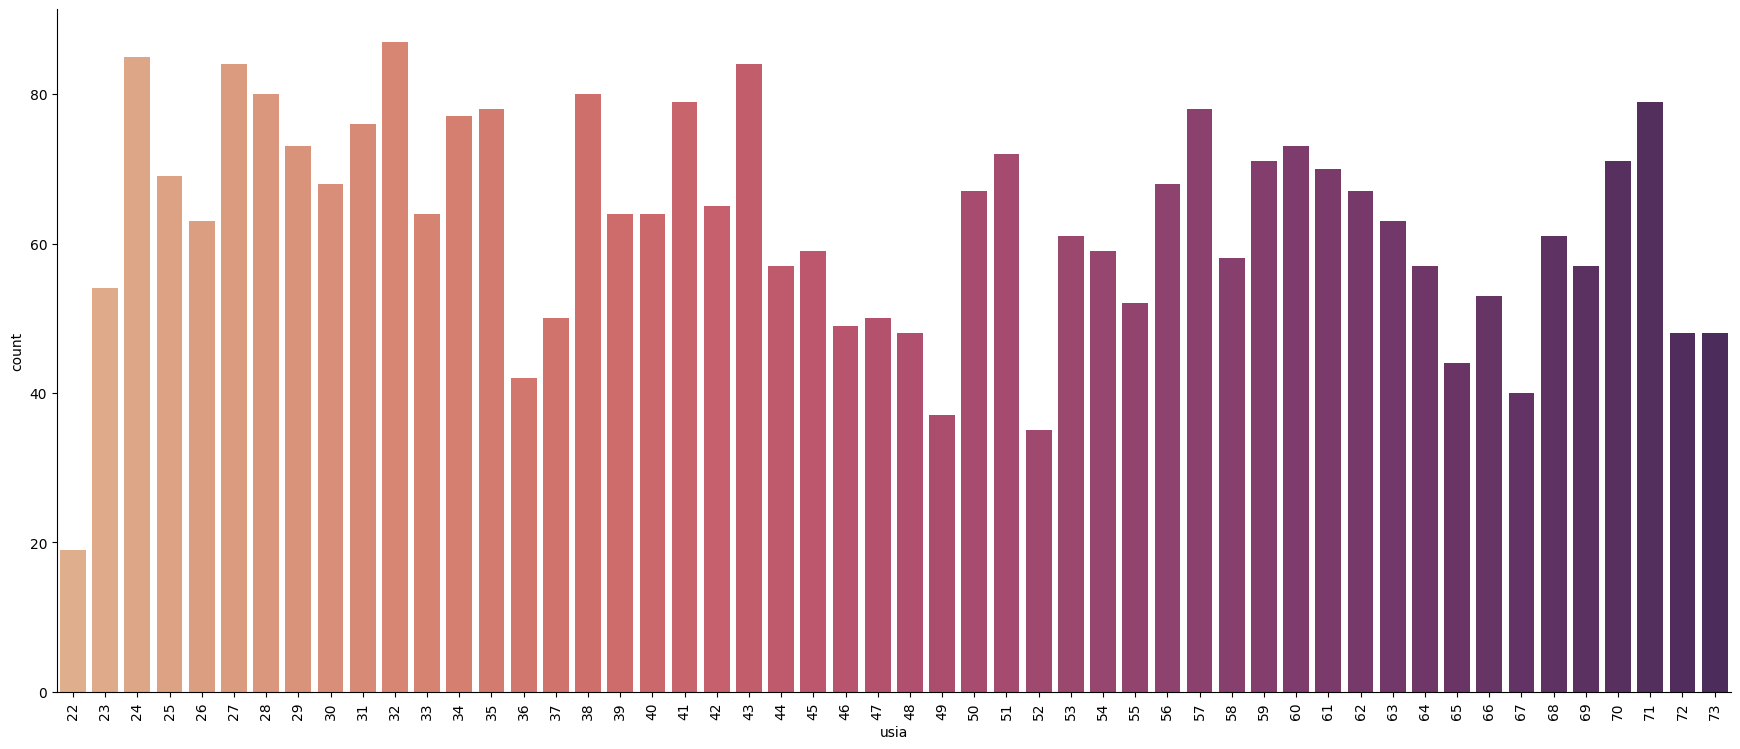

In [199]:
#visualisasi customer dan tingkat pembelian
g = sns.catplot(x="usia", kind="count", palette="flare", data=df_join_1)
g.set_xticklabels(rotation=90)
g.fig.set_size_inches(20,8)
#plt.show()

Berapa rata-rata umur customer pada tiap home store?

In [200]:
df_group_umur = df_join_1.groupby('sales_outlet_id')['usia'].mean().reset_index()

In [201]:
df_group_umur 

,sales_outlet_id,usia
0,3,47.981332
1,5,42.898515
2,8,44.022177


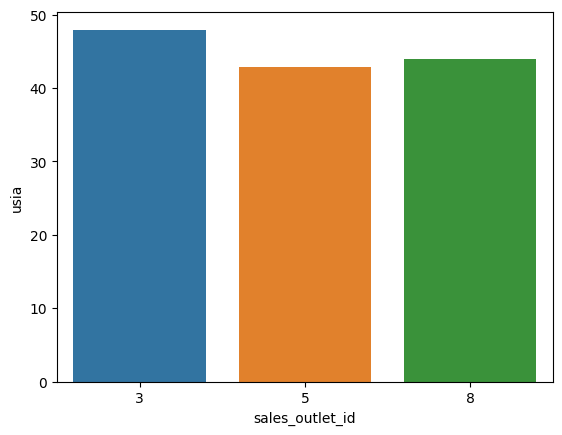

In [202]:
sns.barplot(x="sales_outlet_id", y="usia", data=df_group_umur)
plt.show()

Berapa rata-rata lama customer bergabung

In [203]:
#mengekstrak kolom customer since
df_join_1['day_los'] = (dt.now() - df_join_1['customer_since']).dt.days
df_join_1['los'] = df_join_1['day_los']/365
df_join_1.head()

,index,transaction_id,transaction_date,sales_outlet_id,customer_id,order,product_id,quantity,unit_price,promo_item_yn,home_store,customer_first-name,customer_since,gender,usia,birth_year,day_los,los
0,0,7,2019-04-01,3,558,1,52,1,2.50,N,3,Melissa Johnson,2018-06-19,F,40,1983,1785,4.890411
1,1,1539,2019-04-01,3,558,1,29,1,2.50,N,3,Melissa Johnson,2018-06-19,F,40,1983,1785,4.890411
2,2,2188,2019-04-01,3,558,1,48,2,2.50,N,3,Melissa Johnson,2018-06-19,F,40,1983,1785,4.890411
3,3,78,2019-04-02,3,558,1,60,1,3.75,N,3,Melissa Johnson,2018-06-19,F,40,1983,1785,4.890411
4,4,14,2019-04-03,3,558,1,32,1,3.00,N,3,Melissa Johnson,2018-06-19,F,40,1983,1785,4.890411


In [204]:
#melihat rata-rata lama customer bergabung (satuan tahun)
df_join_1['los'].mean()

5.217194577748243

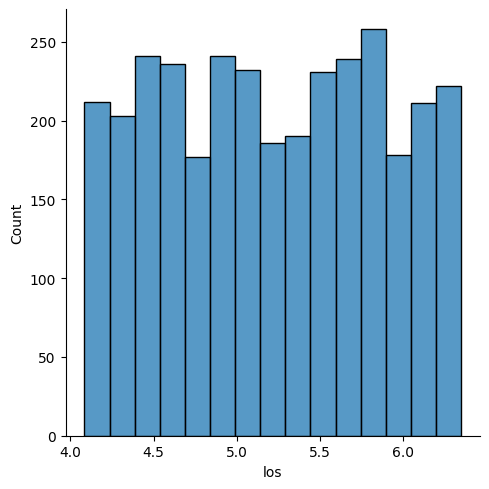

In [205]:
#menampilkan histogram 
sns.displot(data=df_join_1, x="los")

Berapa proporsi gender customer

<Axes: xlabel='gender', ylabel='gender_pct'>

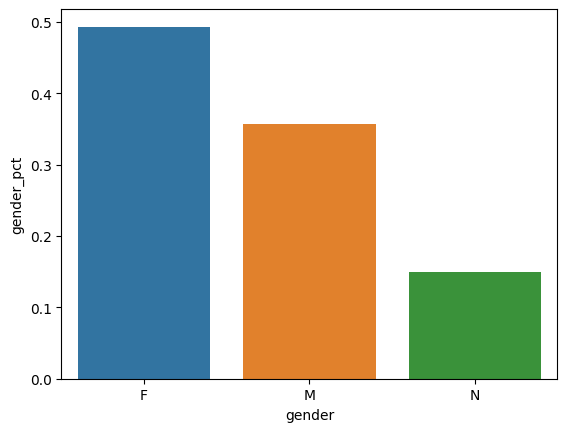

In [206]:
df_cust = df_join_1.groupby('gender')['customer_id'].count()
df_cust2 = (df_cust/df_cust.sum()).reset_index()
df_cust2.rename(columns = {'customer_id': 'gender_pct'}, inplace = True)

sns.barplot(data = df_cust2, x = 'gender', y = 'gender_pct')

####Product

In [207]:
#join untuk melihat problem statement produk 
join_2 = df_sales_receipts.merge(df_product, how='inner', on='product_id')

In [208]:
join_2.head(2)

,transaction_id,transaction_date,sales_outlet_id,customer_id,order,product_id,quantity,unit_price,promo_item_yn,product_group,product_category,product_type,product,current_wholesale_price,current_retail_price_value,tax_exempt_yn,promo_yn,new_product_yn
0,7,2019-04-01,3,558,1,52,1,2.5,N,Beverages,Tea,Brewed Chai tea,Traditional Blend Chai Rg,0.63,2.5,Y,N,N
1,249,2019-04-01,3,22,1,52,1,2.5,N,Beverages,Tea,Brewed Chai tea,Traditional Blend Chai Rg,0.63,2.5,Y,N,N


Berapa banyak jumlah pembelian pada tiap product group?


In [209]:
group_product = join_2.groupby(['product_group'])['quantity'].sum().sort_values(ascending= False).reset_index()
group_product

,product_group,quantity
0,Beverages,59105
1,Food,7764
2,Add-ons,3466
3,Whole Bean/Teas,1168
4,Merchandise,255


<Axes: xlabel='product_group', ylabel='quantity'>

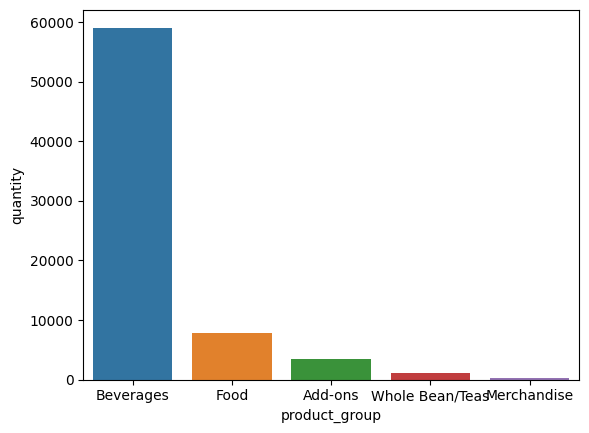

In [210]:
sns.barplot(data = group_product, x = 'product_group', y = 'quantity')

Pada bulan April transaksi tertinggi terjadi pada tanggal berapa?

In [211]:
group_daily= join_2.groupby(['transaction_date'])['transaction_id'].count().sort_values(ascending= False).reset_index()
group_daily.rename(columns={'transaction_id':'jumlah transaksi'},inplace=True)
group_daily.head()

,transaction_date,jumlah transaksi
0,2019-04-19,1907
1,2019-04-16,1897
2,2019-04-27,1852
3,2019-04-08,1846
4,2019-04-18,1844


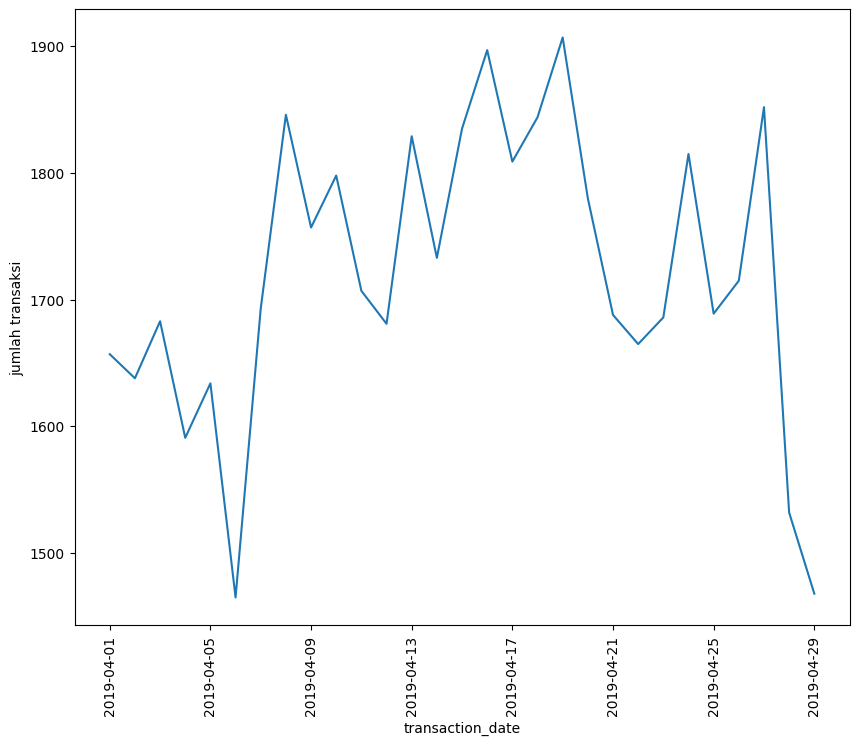

In [212]:
plt.figure(figsize=(10,8))
ax = sns.lineplot(data=group_daily, x="transaction_date", y="jumlah transaksi")
plt.xticks(rotation=90)
plt.show()

Product category yang memiliki jumlah penjulan paling banyak

In [213]:
group_pcategory = join_2.groupby(['product_category'])['quantity'].sum().sort_values(ascending=False).reset_index()
group_pcategory

,product_category,quantity
0,Coffee,30058
1,Tea,23199
2,Bakery,7764
3,Drinking Chocolate,5848
4,Flavours,3466
5,Coffee beans,616
6,Loose Tea,401
7,Branded,255
8,Packaged Chocolate,151


<Axes: xlabel='product_category', ylabel='quantity'>

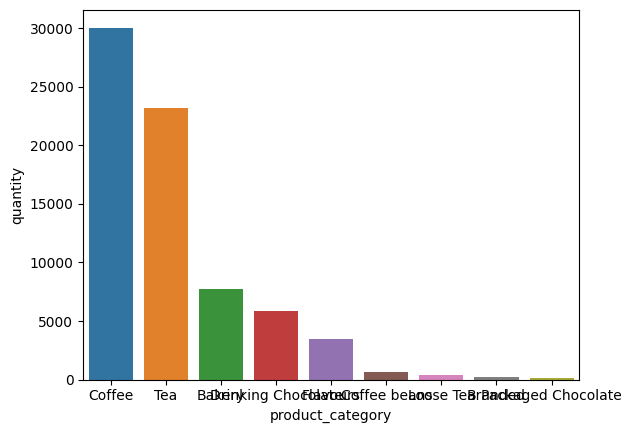

In [214]:
sns.barplot(data = group_pcategory, x = 'product_category', y = 'quantity')

Berapa banyak jumlah order pada product type?

In [215]:
group_ptype = join_2.groupby(['product_type'])['quantity'].sum().sort_values().reset_index()
group_ptype

,product_type,quantity
0,Green beans,48
1,Green tea,48
2,Organic Chocolate,65
3,House blend Beans,65
4,Clothing,79
5,Drinking Chocolate,86
6,Herbal tea,99
7,Espresso Beans,100
8,Black tea,103
9,Gourmet Beans,120


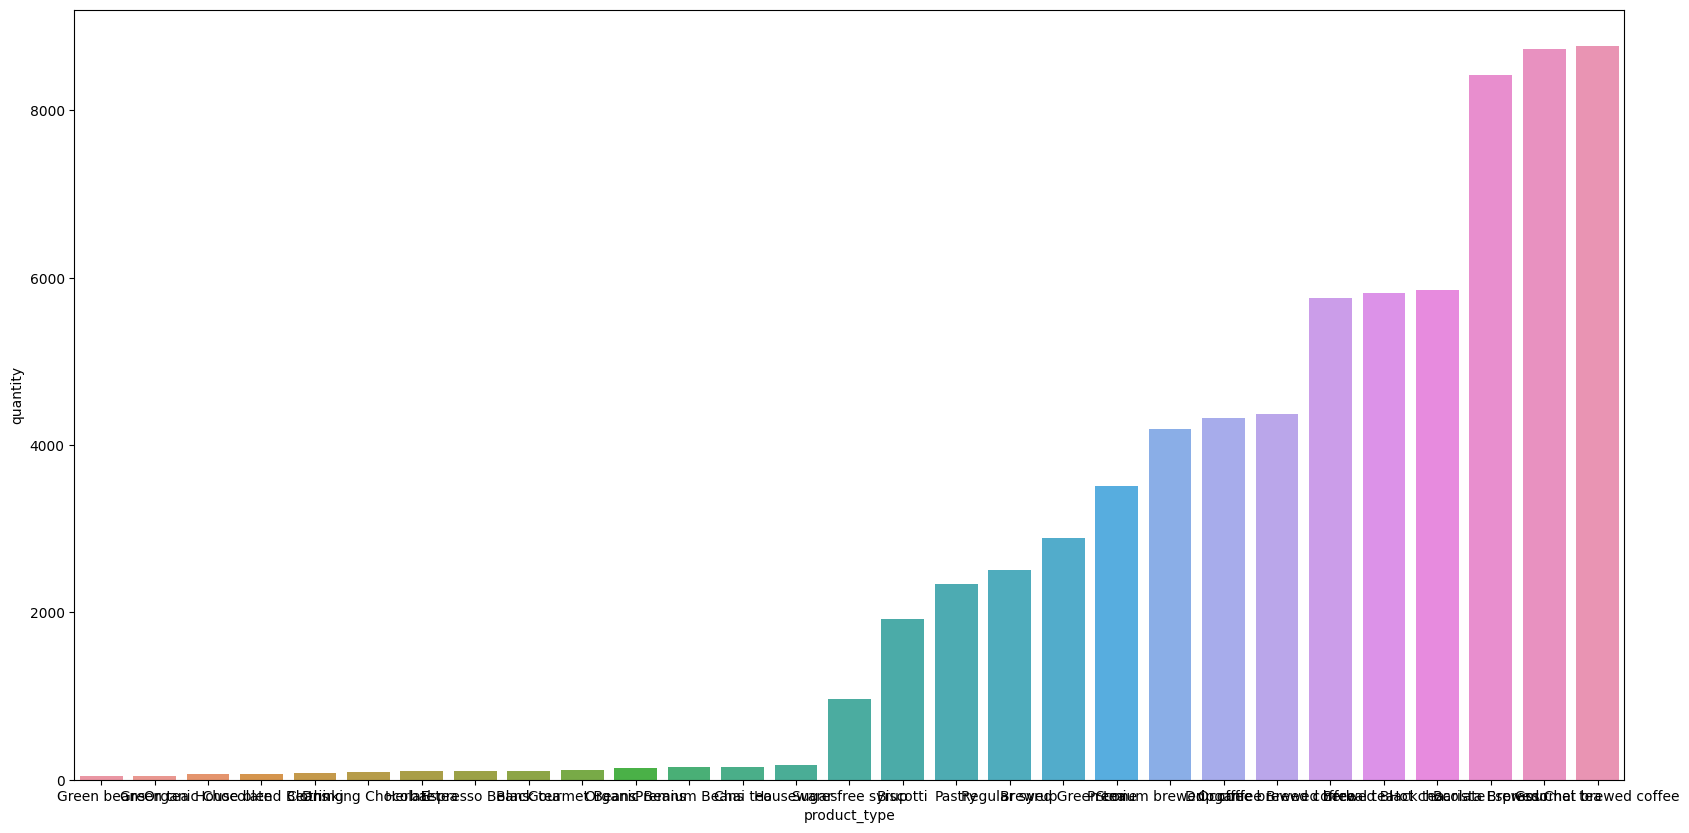

In [216]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=group_ptype, x="product_type", y="quantity", ax=ax)
plt.show()

####Statement Sales Outlet


In [217]:
#join untuk melihat problem statement sales outlet
join_3 = df_sales_receipts.merge(df_sales_outlet, how='inner', on='sales_outlet_id')
join_3.head(3)

,transaction_id,transaction_date,sales_outlet_id,customer_id,order,product_id,quantity,unit_price,promo_item_yn,sales_outlet_type,store_city,store_state_province,store_longitude,store_latitude,manager,Neighorhood
0,7,2019-04-01,3,558,1,52,1,2.5,N,retail,Long Island City,NY,-73.924008,40.761196,6.0,Astoria
1,11,2019-04-01,3,781,1,27,2,3.5,N,retail,Long Island City,NY,-73.924008,40.761196,6.0,Astoria
2,19,2019-04-01,3,788,1,46,2,2.5,N,retail,Long Island City,NY,-73.924008,40.761196,6.0,Astoria


Produk rekomendasi yang menjadi produk terlaris pada masing-masing store

In [218]:
join_pr = join_3.merge(df_product, how='inner', on='product_id')
join_pr.head(3)

,transaction_id,transaction_date,sales_outlet_id,customer_id,order,product_id,quantity,unit_price,promo_item_yn,sales_outlet_type,...,Neighorhood,product_group,product_category,product_type,product,current_wholesale_price,current_retail_price_value,tax_exempt_yn,promo_yn,new_product_yn
0,7,2019-04-01,3,558,1,52,1,2.5,N,retail,...,Astoria,Beverages,Tea,Brewed Chai tea,Traditional Blend Chai Rg,0.63,2.5,Y,N,N
1,249,2019-04-01,3,22,1,52,1,2.5,N,retail,...,Astoria,Beverages,Tea,Brewed Chai tea,Traditional Blend Chai Rg,0.63,2.5,Y,N,N
2,326,2019-04-01,3,659,1,52,2,2.5,N,retail,...,Astoria,Beverages,Tea,Brewed Chai tea,Traditional Blend Chai Rg,0.63,2.5,Y,N,N


Berapa penjualan tiap outlet?

In [219]:
group_outlet = join_3.groupby(['sales_outlet_id','Neighorhood'])['quantity'].sum().sort_values(ascending= False).reset_index()
group_outlet

,sales_outlet_id,Neighorhood,quantity
0,8,Hell's Kitchen,24109
1,5,Lower Manhattan,24029
2,3,Astoria,23620


<Axes: xlabel='sales_outlet_id', ylabel='quantity'>

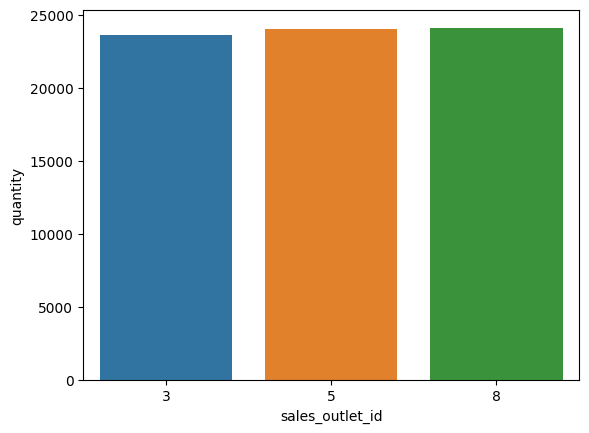

In [220]:
sns.barplot(data = group_outlet, x = 'sales_outlet_id', y = 'quantity')

####Optimalisasi Inventory

In [221]:
#join untuk melihat problem statement pada inventory dan optimalisasi
join_4 = df_pastry_inventory.merge(df_product, how='left', on='product_id')
join_4.head(5)

,sales_outlet_id,transaction_date,product_id,start_of_day,quantity_sold,waste,%_waste,product_group,product_category,product_type,product,current_wholesale_price,current_retail_price_value,tax_exempt_yn,promo_yn,new_product_yn
0,3,2019-04-01,69,18,8,10,56,Food,Bakery,Biscotti,Hazelnut Biscotti,2.28,3.50,N,N,N
1,3,2019-04-01,70,18,12,6,33,Food,Bakery,Scone,Cranberry Scone,2.11,3.25,N,N,N
2,3,2019-04-01,71,18,8,10,56,Food,Bakery,Pastry,Chocolate Croissant,2.44,3.75,N,N,N
3,3,2019-04-01,72,48,9,39,81,Food,Bakery,Scone,Ginger Scone,2.11,3.25,N,N,N
4,3,2019-04-01,73,18,9,9,50,Food,Bakery,Pastry,Almond Croissant,2.44,3.75,N,N,N


Product apa saja yang memiliki tingkat sisa (waste) paling banyak?

In [222]:
group_waste = join_4.groupby(['product'])['waste'].sum().sort_values(ascending= False).reset_index()
group_waste

,product,waste
0,Ginger Scone,2140
1,Almond Croissant,600
2,Cranberry Scone,596
3,Hazelnut Biscotti,585
4,Chocolate Croissant,579


<Axes: xlabel='product', ylabel='waste'>

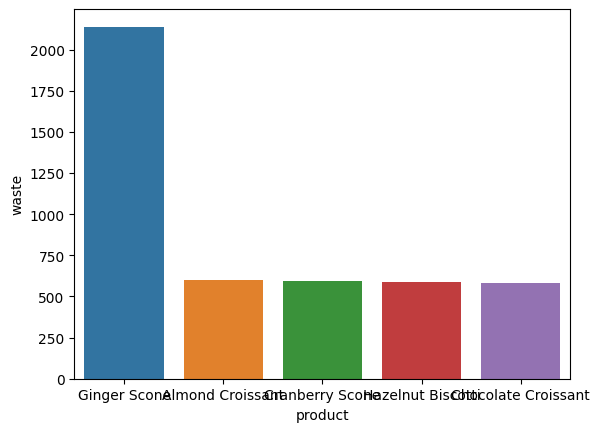

In [223]:
sns.barplot(x="product", y="waste", data=group_waste)

In [224]:
#join #join untuk melihat problem statement pada inventory dan optimalisasi (2)
join_5 = join_4.merge(df_sales_outlet, how='outer', on='sales_outlet_id')
join_5.head(3)

,sales_outlet_id,transaction_date,product_id,start_of_day,quantity_sold,waste,%_waste,product_group,product_category,product_type,...,tax_exempt_yn,promo_yn,new_product_yn,sales_outlet_type,store_city,store_state_province,store_longitude,store_latitude,manager,Neighorhood
0,3,2019-04-01,69.0,18.0,8.0,10.0,56.0,Food,Bakery,Biscotti,...,N,N,N,retail,Long Island City,NY,-73.924008,40.761196,6.0,Astoria
1,3,2019-04-01,70.0,18.0,12.0,6.0,33.0,Food,Bakery,Scone,...,N,N,N,retail,Long Island City,NY,-73.924008,40.761196,6.0,Astoria
2,3,2019-04-01,71.0,18.0,8.0,10.0,56.0,Food,Bakery,Pastry,...,N,N,N,retail,Long Island City,NY,-73.924008,40.761196,6.0,Astoria


## 8. Rekomendasi

Berdasarkan analisis dan visualisasi yang sudah dilakukan, maka ada beberapa rekomendasi yang dapat diberikan untuk Coffee Shop diantaranya :

1. Meningkatkan promosi untuk product group seperti food, add-ons, whole beams/teans dan merchandise karena product group beverage lebih diminati baik itu oleh perempuan dan laki-laki ketimbang keempat produk tersebut, hal ini dapat dilakukan untuk meningkatkan penjualan produk pada tiap produk grup tersebut sehingga dapat meningkatkan revenue coffee shop.

2. Menjaga dan meningkatkan kualitas loyalitas customer, memberikan promo menarik karena terlihat bahwa jumlah customer yang bergabung dari tahun 2017 hingga 2019 mengalami penurunan baik itu customer perempuan maupun laki-laki.

3. Konsisten memberikan kualitas menu dan penyajian product yang sama antara laki-laki dan perempuan karena selera antara perempuan dan laki-laki cenderung sama hal ini terlihat dari jumlah produk kategori yang secara signifikan menunjukkan jumlah yang tidak jauh berbeda.

4. Menawarkan atau memberikan rekomendasi menu andalan kepada customer pada tiap outlet dengan memberikan pilihan 5 pilihan produk dengan jumlah pembelian tertinggi kepada customer bertujuan untuk menarik minat customer pada tiap outlet.

5. Memberikan harga promo atau penawaran menarik bisa seperti discount dengan minimal pembelian atau sistem buy one get one pada product dark chocolate dan spicy eye opener chai karena kedua produk tersebut merupakan produk non promo yang pada ketiga outlet ternyata memilki quantity penjualan paling rendah.

6. Melakukan analisis mendalam terkait faktor lonjakan kenaikan atau penurunan jumlah daily transaction pada tanggal-tanggal tertentu pada masing-masing outlet.

7. Menjaga kualitas dan cita rasa pada product category coffee karena menjadi product yang paling diminati.

8. Melakukan evaluasi kualitas product Ginger Scone pada ketiga outlet karena product ini merupakan produk dengan jumlah sisa paling banyak diantara produk lain.




## 9. Kesimpulan - Create the story

Kesimpulan :

a.	Rata-rata usia customer pada Coffee Shop tersebut adalah adalah 46 tahun, didominasi oleh customer perempuan dan generasi Gen X pada perempuan lalu generasi baby boomers pada laki-laki. 

b.	Jumlah customer yang bergabung mengalami penurunan dari tahun 2017 hingga 2019.

c.	Produk yang paling diminati berdasarkan gender adalah product group beverage, sedangkan product group yang perlu mendapatkan penanganan khusus yaitu merchandise karena merupakan product dengan jumlah penjualan paling sedikit diantara product beverage lainnaya.

d.	Berdasarkan poin sebelumnya, product group beverage adalah produk group dengan penjualan tertinggi diantara product yang menjadi menu product beverage adalah coffee, tea, drinking chocolate. Ketiga ini merupakan 3 product category teratas yang diminati oleh customer baik itu laki-laki ataupun perempuan.

e.	Pada ketiga outlet memiliki 5 product dengan jumlah pembelian tertinggi diantanya adalah early grey rg, dark chocolate lg, latte, sustainably grow organic lg dan chocolate croissant. Pada sales outlet 3 atau pada lingkungan Astoria product dengan penjualan paling tinggi adalah early grey, pada outlet 5 area Lower Manhattan product dengan minat tertinggi adalah latte sedangkan pada outlet 8 yaitu area Hells Kitchen sustainably grow organic lg merupakan product penjualan yang tertinggi.

f.	Product dengan penjualan rendah adalah dark chocolate dan spicy eye opener chai dimana keduanya sama-sama product yang tidak memiliki promo. Pada outlet 5 atau Lower Manhattan dark chocolate hanya terjual 11 item dan spicy eye opener chai 18 item. Lalu pada outlet 8 Hells Kitchen produck penjualan terendahnya adalah spicy eye opener chai hanya 13 item dan dark chocolate 21 item. Selanjutnya pada outlet 3 Astoria ini merupakan outlet dengan jumlah penjualan paling rendah yaitu dark chocolate hanya 4 item dan spicy eye opener chai hanya 11 item.

g.	Performa penjualan pada tiap outlet cenderung fluktuatif pada sales outlet 3 Astoria penjualan tertinggi dengan total penjualan 977 terjadi pada tanggal 24 April sedangkan titik terendah penjualannya adalah pada tanggal 12 April dengan total penjualan 580. Pada outlet sales 5 yaitu Lower Manhattan penjualan tertinggi adalah 1.117 pada tanggl 27 April dan terendah pada 29 April sebanyak 647. Kemudian pada outlet Hells Kitchen penjualan tertinggi adalah 1.88 pada 13 April dan penjualan terendah sebanyak 591 pada 29 April.

h.	Product category coffee memiliki product dengan penjualan tertinggi yaitu Latte, Ethiopia Rg, dan Coloumbian Medium Roasted Lg. Pada drinking chocolate, dark chocolate lg dan sustainably grown organic lg merupakan product paling diminati. Selanjutnya product kategori tea ada early grey rg, morning sunrise chai rg, serenity green tea rg, peppermint rg dan traditional blen chai rg.

i.	Product group beverages menjadi top product group untuk tiap outlet berdasarkan generasi customer, diikuti oleh product group food dan add ons. Sedangkan product group whole bean/teas dan merchandise menjadi product kurang diminati.
